#### Idea

- Access spotify with authorization. Get one(all) of your playlists and tracks. 
- Get information/features of those tacks and cluster them together to find trends in your taste of music.
- Maybe sort by dates and see how your taste has evolved?
- ^I like this idea

---Damn I think I am taking my music too seriously

##### Roadmap
We don't have time, so lets get it working quickly. Following are the steps
- Understand how to interact with spotify api
- register your app
- get access to your playlists. Get songs from a playlist. This should conclude phase 1.
- get features for your songs. Save them in database? Plot them?
- Advanced: 
  - Run a clustering algorithm to find labels to define your music
  - Try to find related artists, go through their music and find similar?

In [1]:
import spotipy
sp = spotipy.Spotify()

results = sp.search(q='beethoven', limit=20)
for i, t in enumerate(results['tracks']['items']):
    print (' ', i, t['name'])

  0 Sonata No. 14 "Moonlight" in C-Sharp Minor", Op. 27 No. 2: I. Adagio sostenuto
  1 Horn Sonata in F Major, Op. 17 (version for flute and fortepiano): I. Allegro moderato
  2 Horn Sonata in F Major, Op. 17 (version for flute and fortepiano): III. Allegro moderato
  3 Horn Sonata in F Major, Op. 17 (version for flute and fortepiano): II. Poco adagio, quasi andante
  4 Flute Sonata in B-Flat Major, Anh. 4 (version for flute and fortepiano): II. Polonaise
  5 Flute Sonata in B-Flat Major, Anh. 4 (version for flute and fortepiano): I. Allegro moderato
  6 Flute Sonata in B-Flat Major, Anh. 4 (version for flute and fortepiano): III. Largo
  7 Flute Sonata in B-Flat Major, Anh. 4 (version for flute and fortepiano): IV. Allegretto molto con variazione
  8 Serenade in D Major, Op. 41 (version for flute and fortepiano): I. Entrata: Allegro
  9 Serenade in D Major, Op. 41 (version for flute and fortepiano): II. Tempo ordinario d'un menuetto
  10 Serenade in D Major, Op. 41 (version for flute 

In [2]:

# from flask import Flask, request, render_template
# from flask import Flask, request, session, g, redirect, url_for, abort, \
#      render_template, flash
# from werkzeug.utils import secure_filename
import sqlite3
import os
import requests
import re
from urllib.request import urlopen
from bs4 import BeautifulSoup
import json


### Basic Requests

In [3]:
#coldpaly - spotify:artist:4gzpq5DPGxSnKTe4SA8HAU
response = requests.get("https://api.spotify.com/v1/artists/4gzpq5DPGxSnKTe4SA8HAU")
print (response)

<Response [200]>


In [4]:
jsonstr = response.content.decode()
jsonstr

'{\n  "external_urls" : {\n    "spotify" : "https://open.spotify.com/artist/4gzpq5DPGxSnKTe4SA8HAU"\n  },\n  "followers" : {\n    "href" : null,\n    "total" : 6333123\n  },\n  "genres" : [ "permanent wave", "pop", "pop christmas", "rock" ],\n  "href" : "https://api.spotify.com/v1/artists/4gzpq5DPGxSnKTe4SA8HAU",\n  "id" : "4gzpq5DPGxSnKTe4SA8HAU",\n  "images" : [ {\n    "height" : 1000,\n    "url" : "https://i.scdn.co/image/31fa9aa639d539dc93ab9e3570c7c70a1b5c64f8",\n    "width" : 1000\n  }, {\n    "height" : 640,\n    "url" : "https://i.scdn.co/image/f700aaf6ebf1f0105d4eece756d924ab7efc3441",\n    "width" : 640\n  }, {\n    "height" : 200,\n    "url" : "https://i.scdn.co/image/32e13d2c37af4817d1cbf09742c1f51a328820c7",\n    "width" : 200\n  }, {\n    "height" : 64,\n    "url" : "https://i.scdn.co/image/3f31f2b7e890c2e59a9e4d67ea37f459e7036991",\n    "width" : 64\n  } ],\n  "name" : "Coldplay",\n  "popularity" : 91,\n  "type" : "artist",\n  "uri" : "spotify:artist:4gzpq5DPGxSnKTe4SA8H

In [5]:
jsloads = json.loads(jsonstr)

In [6]:
jsloads['name']

'Coldplay'

In [7]:
#coldpaly - spotify:artist:4gzpq5DPGxSnKTe4SA8HAU
# response = requests.get("https://api.spotify.com/v1/artists/4gzpq5DPGxSnKTe4SA8HAU")
response = requests.get("https://api.spotify.com/v1/search?q='coldplay'&type=artist")
print (response)
jsonstr = response.content.decode()
jsloads = json.loads(jsonstr)


<Response [200]>


In [8]:
jsloads['artists'].keys()

dict_keys(['total', 'items', 'href', 'previous', 'offset', 'limit', 'next'])

In [9]:
jsloads['artists']['items'][2]

{'external_urls': {'spotify': 'https://open.spotify.com/artist/58naUc4Fd9OoP6UrdrpgFO'},
 'followers': {'href': None, 'total': 72},
 'genres': [],
 'href': 'https://api.spotify.com/v1/artists/58naUc4Fd9OoP6UrdrpgFO',
 'id': '58naUc4Fd9OoP6UrdrpgFO',
 'images': [{'height': 640,
   'url': 'https://i.scdn.co/image/7e544bb9b858905f95ed9aa96a186ceeca94f282',
   'width': 640},
  {'height': 300,
   'url': 'https://i.scdn.co/image/072dd1a6fcf580629efa78f55c4e76df6a509780',
   'width': 300},
  {'height': 64,
   'url': 'https://i.scdn.co/image/03ca05365ef52b26f844a359a27cd0f59cadd00c',
   'width': 64}],
 'name': 'ColdPlay Wu',
 'popularity': 0,
 'type': 'artist',
 'uri': 'spotify:artist:58naUc4Fd9OoP6UrdrpgFO'}

<hr />
<hr />


## Authorization
Phew, the following needs to be summarized for future dumb me. <br>
Basically, to authorize, you send the client id and redirect uri of your app to the spotify. This is done by accessing accounts.spotify.com/authorize?response_type=code?client_id=xyz. <br>
**Client_id** tells which app is asking for authorization. It prompts you to login, which is basically asking which account you want to access. If the login is successful, it redirects you to **redirect_uri**. <br>
This is the url/server which is listening. When you are redirected to this link, its path is appended with **?code =** after which spotify is giving you the authorization response, basically stating that yea, everything is okay<br>
You can then use this response to get the access token(which needs to be refreshed and stuff). <br>
Good workflow is here http://requests-oauthlib.readthedocs.io/en/latest/oauth2_workflow.html#web-application-flow

In [10]:
import os 
#becuase by default, OAUTH2 requires https but we are at http.
os.environ['OAUTHLIB_INSECURE_TRANSPORT'] = '1'
import urllib.parse as urlparse
from urllib.parse import urlencode



In [11]:
#Details of you 
client_id = "42b6ab36875d43128f6b750da5c0e987"
client_secret = "8c1dcb159aee4d69962e0b357f048eec"
redirect_uri = 'http://127.0.0.1:8080/callback/q'
#'http://localhost:5000/callback'
# 'http://localhost:8888/callback'
# http://127.0.0.1:8080/callback/q
auth_url = "https://accounts.spotify.com/authorize"
token_url = "https://accounts.spotify.com/api/token"

In [14]:
from requests_oauthlib import OAuth2Session

scopes = 'playlist-read-private playlist-read-collaborative playlist-modify-public playlist-modify-private user-follow-modify \
user-follow-read user-library-read user-top-read'
# scopes = 'playlist-read-private playlist-read-collaborative playlist-modify-public playlist-modify-private user-follow-modify\
# user-follow-read user-library-read user-library-modify user-top-read'
oauth = OAuth2Session(client_id, redirect_uri=redirect_uri,
                          scope=scopes, state = "34fFs29kd09")
authorization_url, state = oauth.authorization_url(auth_url)
print ('Please go to %s and authorize access.' % authorization_url)
authorization_response =  input('Enter the URL you were redirected to')
### Note that the page might say This site can’t be reached and connection refused, 
### but you are only interested in url
### This last bit is important!

In [120]:
token = oauth.fetch_token(
        token_url,
        authorization_response=authorization_response,
        client_secret=client_secret)

In [121]:
token

{'access_token': 'BQDmKFUFniqpDyyUPWz96lJAi_0abkb1JBJz34IYn1yiLaJlxVYjs_YEW5G5MAlSjSR5ZHNtXp7cnGyBjt-HrqPNWDkYxw5UILeuZ1kawsobEioKQeW0YNScmxRxlv6XnA9Tf-8ni2ENI41HHJOOkltlXB7rba853ZujpIDTbtimBb2qS594nEBjnRFhNKWpXXt_7j_ipRoSKj76a_1hebvIdpyysK71RRxYJNBkTkAqKrBizhziZdVGFUz1rZJSZf1ZDNpevMbh3p9996gOSaglLP_QoKPCByz9uIvv7R0',
 'expires_at': 1478409679.50523,
 'expires_in': 3600,
 'refresh_token': 'AQAInt8qHGwQsucSJhJn66sDbSsj3ZRqksFzwKaWfCOOHZxKtz6mnpNB6k29s2pYKgxYPVBSZ3Lz9mXBCpLE3CgPw_b-OrURDH1tgIddkF7sNaaVonApHDpcxFaj1MPYAVI',
 'scope': ['playlist-read-private',
  'playlist-read-collaborative',
  'user-follow-modify',
  'user-library-read',
  'user-follow-read',
  'playlist-modify-private',
  'playlist-modify-public',
  'user-top-read'],
 'token_type': 'Bearer'}

#### Roadmap to wisely extract and save all the data:

Create a class for the user with the following things:
- when called, initiate by autheticating the user
- Save his information from /me
- Extract the names and uri of his playlists

In [219]:
import numpy as np

class spotifyuser():
    
    def __init__(self, scope = None, redirect_uri = None):
        if scope is None:
            self.scope = 'playlist-read-private playlist-read-collaborative playlist-modify-public playlist-modify-private user-follow-modify \
user-follow-read user-library-read user-top-read'
        else:
            self.scope = scope
        if redirect_uri is None:
            self.redirect_uri = 'http://127.0.0.1:8080/callback/q'
        else:
            self.redirect_uri  = redirect_uri

            #Details of you 
        self.client_id = "42b6ab36875d43128f6b750da5c0e987"
        self.client_secret = "8c1dcb159aee4d69962e0b357f048eec"
        self.auth_url = "https://accounts.spotify.com/authorize"
        self.token_url = "https://accounts.spotify.com/api/token"
        self.base_url = "https://api.spotify.com/v1/"
        self.oauth = OAuth2Session(client_id, redirect_uri=self.redirect_uri,
                          scope= self.scope, state = "34fFs29kd09")
        self.token = self.do_authorize()
        self.me = self.get_me()
        self.playlists = self.get_playlist() 
            
    def do_authorize(self):
        authorization_url, state = self.oauth.authorization_url(auth_url)
        print ('Please go to %s and authorize access.' % authorization_url)

        authorization_response =  input('Enter the URL you were redirected to')
        token = self.oauth.fetch_token(token_url, authorization_response=authorization_response,
                                        client_secret=self.client_secret)
        return token
        
    def get_me(self):
        '''get user info from endpoint /me'''
        response = self.oauth.get(self.base_url + "me")
        meinfo = json.loads(response.content.decode())
        return meinfo

    def get_playlist(self):
        response = self.oauth.get(self.base_url + "users/%s/playlists?limit=50"%self.me["id"])
        names = []
        ids = []
        owner = []
        no_tracks = []
        while True:
            playlists = json.loads(response.content.decode())
            isnext = playlists['next']
            for play in playlists['items']:
                names.append(play['name'])
                ids.append(play['id'])
                owner.append(play['owner']['id'])
                no_tracks.append(play['tracks']['total'])
            if isnext:
                response = self.oauth.get(isnext)
            else: break

        toret = {}
        toret['Name'] = np.array(names)
        toret['Id'] = np.array(ids)
        toret['Owner'] = np.array(owner)
        toret['Length'] = np.array(no_tracks)
        return toret

    def get_playlist_details(self, name = None, ids = None):
        if name is None and ids is None:
            print("Give either name or id")
            return None
        else:
            if name is not None:
                ids = self.findxfory_playlist('Id', "Name", name)[0]
            else:
                name = self.findxfory_playlist('Name', "Id", ids)[0]
        trackitems = "items(added_at,track(name,id,album.name,artists.name,popularity))"
        tracksfield = 'tracks(total,previous,offset,limit,next,%s)'%trackitems
        fields = ["id", "name", tracksfield, "description"]

        create_url = self.base_url + "users/%s/playlists/%s"%(self.me['id'], ids)
        for foo in range(len(fields)):
            if not foo:
                create_url += "?fields="
            else:
                create_url += ","
            create_url += str(fields[foo])
        response = self.oauth.get(create_url)
        playlist = json.loads(response.content.decode())
        return playlist
    
    
    
    def get_song_features(self, playlist=None, ids= None, name = None):
        if name is None and ids is None and playlist is None:
            print("Give either name or id or playlist object")
            return None
        else:
            if name is not None:
                ids = self.findxfory_playlist('Id', "Name", name)[0]
                playlist = self.get_playlist_details(ids =ids)
            elif id is not None:
                name = self.findxfory_playlist('Name', "Id", ids)[0]
                playlist = self.get_playlist_details(ids =ids)
        
        
    
    def refresh_token(self):
        response =requests.post(self.token_url, data={'client_id':self.client_id, \
                                            'client_secret':self.client_secret, \
                                            'grant_type':"refresh_token", 
                                            'refresh_token':self.token['refresh_token']})

        newtoken = json.loads(response.content.decode())
        for key in newtoken:
            self.token[key] = newtoken[key]
            self.oauth.token[key]= newtoken[key]

            
    def findxfory_playlist(self, x, y, yval):
        toret = self.playlists[x][self.playlists[y] == yval]
        if len(toret) ==0:
            return "Not found"
        else: return toret
        
    def mapdict(self, dictionary):
        toret = []
        if type(dictionary) != 'dict':
            return "Give a dictionary"
        for key in dictionary.keys():
            toret.append((key, type(dictionary[key])))
        return toret

    
    
    #         self.oauth = OAuth2Session(self.client_id, token=self.token,
        #                           auto_refresh_url=self.token_url)
        # oauth.refresh_token(chirag.token_url, chirag.token['refresh_token'])

In [213]:
chirag = spotifyuser()

Please go to https://accounts.spotify.com/authorize?response_type=code&client_id=42b6ab36875d43128f6b750da5c0e987&redirect_uri=http%3A%2F%2F127.0.0.1%3A8080%2Fcallback%2Fq&scope=playlist-read-private+playlist-read-collaborative+playlist-modify-public+playlist-modify-private+user-follow-modify+user-follow-read+user-library-read+user-top-read&state=34fFs29kd09 and authorize access.
Enter the URL you were redirected tohttp://127.0.0.1:8080/callback/q?code=AQDXlJiLBV2ik0EXtOr50DyCQR4V5IqaQGvifUs-A5KAs86eQp-oGU6oxHEdoKci6iV8sPUrYxagsPqKxbTdlnRZT52GrJyuqQ8j77-32uYEdHbJbWJGd7idd4fi9Zjt4gZ0b1lImklaGTR-RHgv_oYJgvGpKJJA_k49ZtX3Y3eGjhSFEpdoctX6G6WUHWn5qcwxXKf2X42MVngHk3g31mP3svZ5tqWFpKpWA0pfhCpDlWWt-QEtRVBnmmapuChsKEWGkoYftPZZH4RgtgGWBeBiRf7rOsQx3iTuLNCzciGyIp7BrqZhNYlGIPaGvRx0gPgRLVo56kV_cqDDVMz5YnwNAeCfjZ_4Ocj2aH_LF0oRFoDrMfAgszpVDNaxp3oKR0HcLFkJwWSQwxn0gngwXW756w4OvVkPCOp1vqzBmTrOY34&state=34fFs29kd09


In [214]:
# id_inst = chirag.playlists["Id"][chirag.playlists["Name"] == "Instrumentals"][0]
id_inst = '4C2O2mgKwHdLhYx1qcsj3e'
response = chirag.oauth.get(chirag.base_url + "users/%s/playlists/%s?fields=tracks"%(chirag.me['id'], id_inst))
playlist = json.loads(response.content.decode())
print (playlist.keys())


dict_keys(['tracks'])


In [215]:
playlist = get_playlist_details(ids= "4C2O2mgKwHdLhYx1qcsj3e")
print(playlist.keys())

Ludovico 4C2O2mgKwHdLhYx1qcsj3e
Its better to specify fields
https://api.spotify.com/v1/users/1189956848/playlists/4C2O2mgKwHdLhYx1qcsj3e
<Response [200]>
dict_keys(['external_urls', 'owner', 'followers', 'collaborative', 'type', 'tracks', 'name', 'snapshot_id', 'images', 'href', 'public', 'uri', 'description', 'id'])


In [216]:
# # url = "http://stackoverflow.com/search?q=question"
# # params = {'lang':'en','tag':'python'}

# # print (url)
# # url_parts = list(urlparse.urlparse(url))
# # print(url_parts)
# # query = dict(urlparse.parse_qsl(url_parts[4]))
# # print("query =",query)
# # print ("params = ", params)
# # query.update(params)
# # print("query updatded = ",query)
# # print("urlencode(query) = ", urlencode(query))
# # url_parts[4] = urlencode(query)
# # print(url_parts)
# # print (urlparse.urlunparse(url_parts))

# ids= "4C2O2mgKwHdLhYx1qcsj3e"
# params={"href", "external_urls"}
# create_url = chirag.base_url + "users/%s/playlists/%s"%(chirag.me['id'], ids)
# print(urlparse.urlparse(create_url))
# url_parts = list(urlparse.urlparse(create_url))
# print(url_parts)
# # urlencode(params)


In [342]:
chirag.playlists['Name']

array(['Desi', 'Discovered Weekly', 'Discover Weekly',
       'Berlioz fantastique', 'Brahms 1', 'Brahms 2', 'Beethoven 3rd',
       'Beethoven 5th', 'Beethoven 9th', 'Dvorák 9th', 'Haydn 104',
       'Mozart 40', 'Mozart 41', 'Schumann 1', 'Schumann 4th',
       'Schubert 8th', 'Sibelius 5', 'Tchaikovsky 6th', 'RocknRolla',
       'Desi', 'ShitJustGotReal', 'New Songs', 'Peeaanoo?', 'Looper',
       'Wakey Wakey', 'Classical', 'Instrumentals', 'Eclectic',
       'Godspeed You! Black Emperor', 'Ludovico',
       'Exam Study Classical Music Orchestra – Classical Music & Football: 30 Powerful Classical Music Tracks for Your 2014 World Football Cup in Brazil',
       'Various Artists – Ride of the Valkyries - The Greatest Classical Overtures',
       'Holy Shit - An incredibly epic playlist', 'RocknRolla',
       'Massive Attack - Paradise Circus',
       'Symphonic Compilation- Two Steps from Hell & Others', 'Opeth Soft',
       'No Diggity',
       'London Philharmonic Orchestra – The 5

In [347]:
playlist = chirag.get_playlist_details(ids= '0eFdMYoRSaei9fnJLM5ffD')
print ("playlist.keys() ===", playlist.keys())
print ("playlist['tracks'].keys() ===", playlist['tracks'].keys())
# print ("playlist['tracks']['items'].keys() =", playlist['tracks']['items'])
print ("playlist['tracks']['items'][0].keys() ===", playlist['tracks']['items'][0].keys())
print ("playlist['tracks']['items'][0]['track'].keys() ===", playlist['tracks']['items'][0]['track'].keys())
# playlist['tracks']['items'][0]['track']


https://api.spotify.com/v1/users/1189956848/playlists/0eFdMYoRSaei9fnJLM5ffD?fields=id,name,tracks(total,previous,offset,limit,next,items(added_at,track(name,id,album.name,artists.name,popularity))),description
playlist.keys() === dict_keys(['error'])


KeyError: 'tracks'

In [345]:
playlist

{'error': {'message': 'Not found.', 'status': 404}}

In [344]:
len(playlist['tracks']['items'])

KeyError: 'tracks'

In [326]:
playlist.keys()

dict_keys(['tracks', 'name', 'description', 'id'])

In [327]:
playlist['tracks']['next']

In [328]:
songs = []
ids = []
tracklist = playlist['tracks']
print(tracklist.keys())
while True:
    isnext = tracklist['next']
    for play in tracklist['items']:
        songs.append(play['track']['name'])
        ids.append(play['track']['id'])
    if isnext:
        response = chirag.oauth.get(isnext)
        tracklist = json.loads(response.content.decode())

    else: break


dict_keys(['total', 'items', 'previous', 'offset', 'limit', 'next'])


In [329]:
response = chirag.oauth.get(chirag.base_url+ "audio-features/?ids=%s"%(",".join(ids[:100])))
features = json.loads(response.content.decode())
response = chirag.oauth.get(chirag.base_url+ "audio-analysis/%s"%(ids[0]))
analysis = json.loads(response.content.decode())


In [339]:
valence = []
for foo in range(len(features['audio_features'])):
    valence.append(features['audio_features'][foo]['valence'])
#     print (songs[foo], valence[foo])
print("mean happiness is = ", np.array(valence).mean())
happiest = np.argmax(np.array(valence))
print(songs[happiest], valence[happiest])

mean happiness is =  0.196384848485
Dragon Rider 0.878


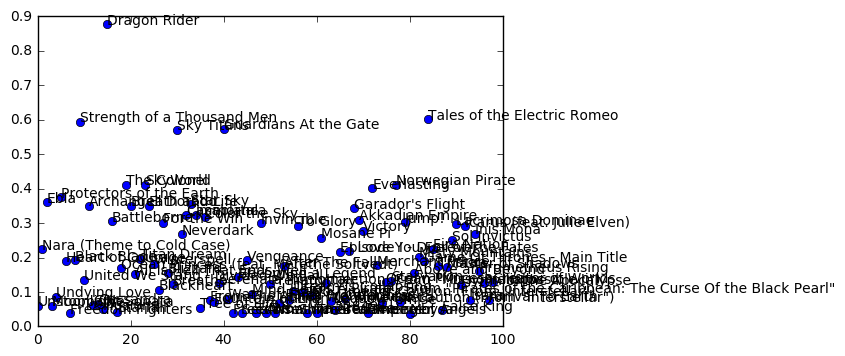

In [338]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(valence, "o")
for x, y, s in zip(np.arange(99), valence, songs):
    plt.text(x,y,s)
